# Машинне навчання


## Асоціації та пошук правил: метод Apriori


###  Лабораторна робота 8


**_Студентка Пороскун Олена. Група ПМ.м-21_**

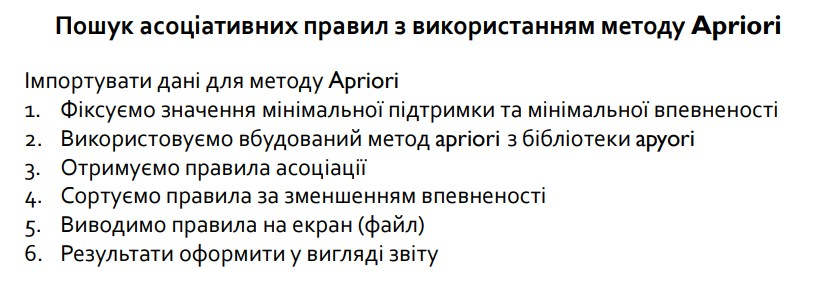

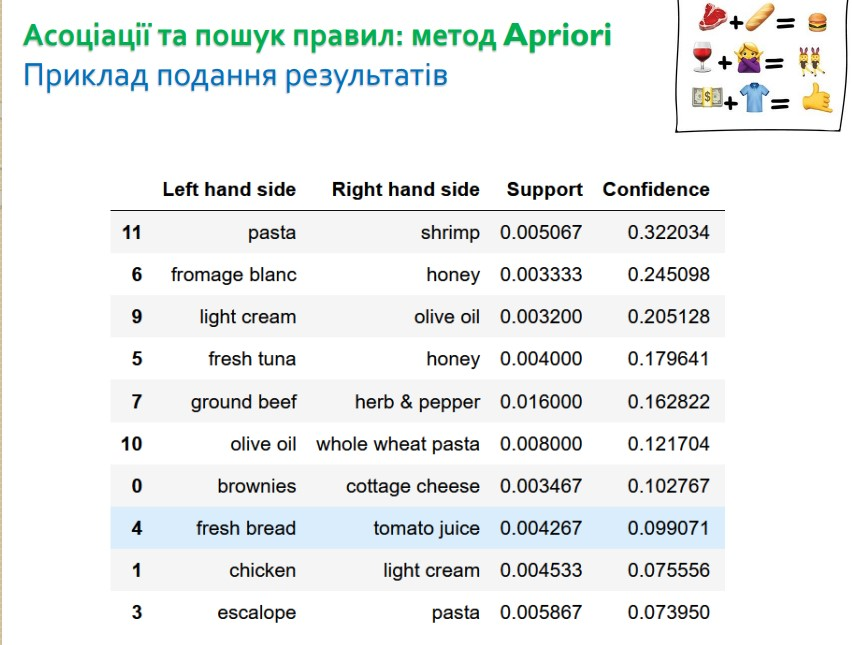

_________________________________________________________________________________________________________________________

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [2]:
!pip install apyori

In [3]:
dataset = pd.read_csv("Market_Basket_Optimisation.csv")
dataset

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(dataset)

7500

In [5]:
data_new = dataset.drop(range(3500,len(dataset)))
data_new

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,burgers,salmon,vegetables mix,carrots,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,tomatoes,rice,oil,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3497,herb & pepper,ground beef,salmon,spinach,honey,protein bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498,chocolate,red wine,tomato sauce,butter,chicken,salmon,french fries,salt,mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
transactions = []
for i in range(0, len(data_new)):
    transactions.append([str(data_new.values[i,j]) for j in range(0,20)])

In [7]:
rules = apriori(transactions = transactions, min_support = 0.003, min_cinfidence = 0.2, \
                min_lift = 3, min_length = 2, max_length = 2)

In [8]:
results = list(rules)
#results

In [9]:
with open("file_results.txt", 'w') as f:
    for s in results:
        f.write(str(s) + '\n')

with open("file_results.txt", 'r') as f:
    results_from_file = [line.rstrip('\n') for line in f]

#print(results_from_file)

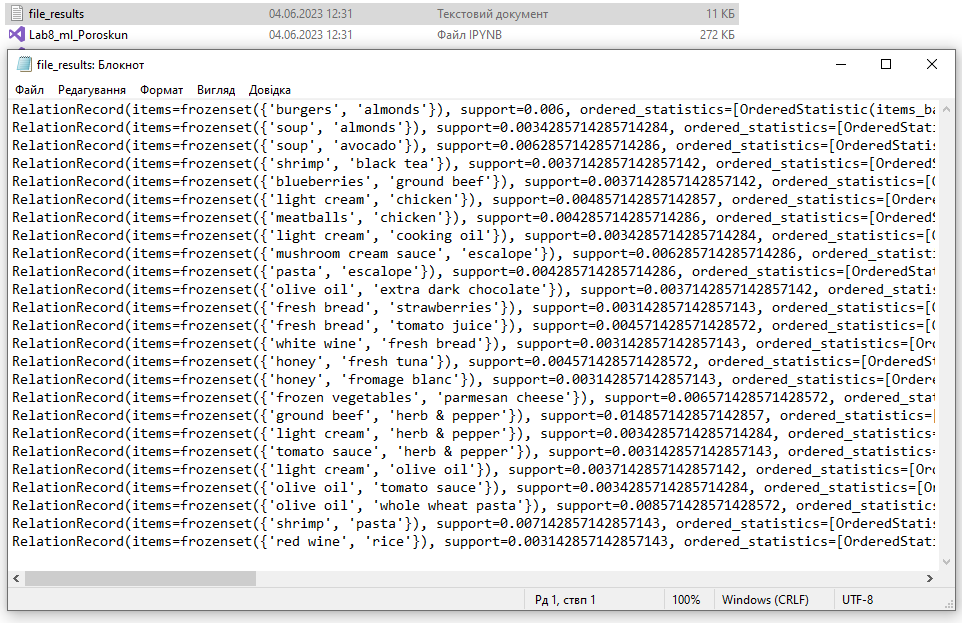

In [10]:
def inspect(results):
    lhs         =[tuple(result[2][0][0])[0] for result in results]
    rhs         =[tuple(result[2][0][1])[0] for result in results]
    supports    =[result[1] for result in results]
    confidences =[result[2][0][2] for result in results]
    lifts        =[result[2][0][3] for result in results]
    return list (zip(lhs, rhs, supports, confidences, lifts))

In [11]:
resultsinDataFrame = pd.DataFrame(inspect(results), \
                                  columns = ["Left hand side", "Right hand side", "Support", "Confidence", "Lift"])
#resultsinDataFrame

In [12]:
resultsinDataFrame.drop('Lift', axis = 1).nlargest(n = 10, columns = "Confidence")

,Left hand side,Right hand side,Support,Confidence
23,pasta,shrimp,0.007143,0.423729
4,blueberries,ground beef,0.003714,0.371429
0,almonds,burgers,0.006000,0.300000
10,extra dark chocolate,olive oil,0.003714,0.295455
3,black tea,shrimp,0.003714,0.282609
15,fromage blanc,honey,0.003143,0.275000
20,light cream,olive oil,0.003714,0.209677
14,fresh tuna,honey,0.004571,0.192771
2,avocado,soup,0.006286,0.174603
1,almonds,soup,0.003429,0.171429


_________________________________________________________________________________________________________________________